In [1]:
%pip install pandas scikit-learn statsmodels matplotlib --quiet
%pip install requests --quiet

# 1. Import our library #

In [2]:
from final_project_module import (
    load_and_clean,
    prepare_business_dataset,
    train_and_eval_logistic,
    train_and_eval_rf,
    forecast_monthly,
    download_csv_from_url
)
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Load & clean the raw CSV data

In [3]:
csv_url = "https://raw.githubusercontent.com/Tony-Long-414/final-report/refs/heads/main/DCWP_Charges_20250618.csv"
save_location = "DCWP_Charges_20250618.csv"

download_csv_from_url(csv_url, save_location)

csv_path = "DCWP_Charges_20250618.csv"  
df = load_and_clean(csv_path)
print("Cleaned DataFrame shape:", df.shape)
df.head()


Downloaded CSV to DCWP_Charges_20250618.csv
Cleaned DataFrame shape: (6562, 18)


,record_id,related_record_type,business_unique_id,business_name,dba_trade_name,business_category,certificate_of_inspection,inspection_number,noh_number,violation_date,charge,charge_count,cure_eligible,cured,outcome,guilty,not_guilty,dismissed
0,11625-2023-ADJC,dcwp_InspectionRequest,BA-1329226-2022,HSYW INC.,7 ELEVEN STORE #32120B,Grocery-Retail,A0136715,INS-000678209,23Q02642,2023-09-25,NYC Admin Code § 20-910(f) - BUSINESS FAILS TO...,1.0,No,No,Pleaded,1,0,0
1,11982-2023-ADJC,dcwp_InspectionRequest,BA-1672343-2023,MOE MOE BEAUTY SALON,NaN,Salons And Barbershop,A0137782,INS-000680097,23Q02692,2023-10-02,NYC Admin Code § 20-750(c) - PRICE LIST DISCLO...,1.0,Yes,Yes,Pleaded,1,0,0
2,10515-2023-ADJC,dcwp_InspectionRequest,BA-1548371-2022,THE CORNER STORE SI NY LLC,NaN,Tobacco Retail Dealer,A0133130,INS-000662286,23T05090,2023-08-26,NYC Admin Code § 17-703.1 - FAILED TO POST CIG...,1.0,No,No,Hearing Decision,1,0,0
3,10515-2023-ADJC,dcwp_InspectionRequest,BA-1548371-2022,THE CORNER STORE SI NY LLC,NaN,Tobacco Retail Dealer,A0133130,INS-000662286,23T05090,2023-08-26,NYC Admin Code § 20-202(a)(1) - BUSINESS ENGAG...,1.0,No,No,Hearing Decision,1,0,0
4,10865-2023-ADJC,dcwp_InspectionRequest,BA-1218247-2022,FRESH CITY DELII INCORPORATED,NaN,Tobacco Retail Dealer,A0130652,INS-000664433,23T05303,2023-08-08,NY Pub Health § 1399-cc(2) - SELLING TOBACCO P...,1.0,No,No,Default Decision,1,0,0


## Violations Over Time 

<ipython-input-4-f22c302d6a64>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M').size()  # counts per month


violation_date
2023-07-31      74
2023-08-31    1415
2023-09-30    1934
2023-10-31    2068
2023-11-30    1013
Freq: ME, dtype: int64


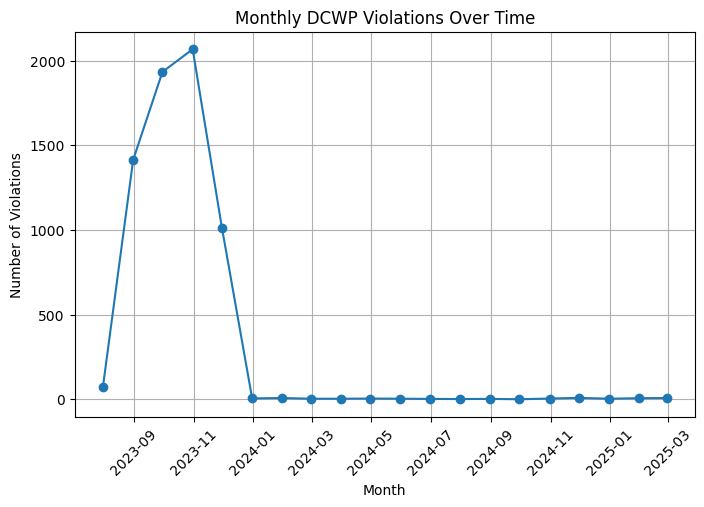

In [4]:
# Trend of violations over time (monthly counts)
# Ensure the data is sorted by date and set index to the date column
df.set_index('violation_date', inplace=True)
# Group by month and count violations in each month
monthly_counts = df.resample('M').size()  # counts per month
print(monthly_counts.head())  # print first few months counts for reference

# Plot the monthly violation counts
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Monthly DCWP Violations Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Top 10 Violation Types

Top 10 violation charges:
 charge
NYC Admin Code § 20-202(a)(1) - BUSINESS ENGAGES IN UNLICENSED TOBACCO RETAIL DEALER ACTIVITY                                                                                          876
NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAGES IN UNLICENSED ELECTRONIC CIGARETTE RETAIL DEALER ACTIVITY                                                                             861
NY Pub Health § 1399-MM1(2) - Selling or offering for sale a flavored vapor product intended or reasonably expected to be used for the consumption of nicotine.                        781
6 RCNY § 5-37 - REFUND POLICY IS NOT POSTED  AT EACH OF CASH REGISTER/S OR AT EACH OF POINTS OF SALE OR AT EACH OF THE STORE ENTRANCES OR REFUND POLICY IS NOT POSTED CONSPICUOUSLY    500
NYC Admin Code § 17-706(c) - FAILED TO POST AGE RESTRICTION SIGN IN A CONSPICUOUS PLACE                                                                                                384
NYC Admin Code § 17-706(a) - SO

<ipython-input-5-c2efcdaeb21b>:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


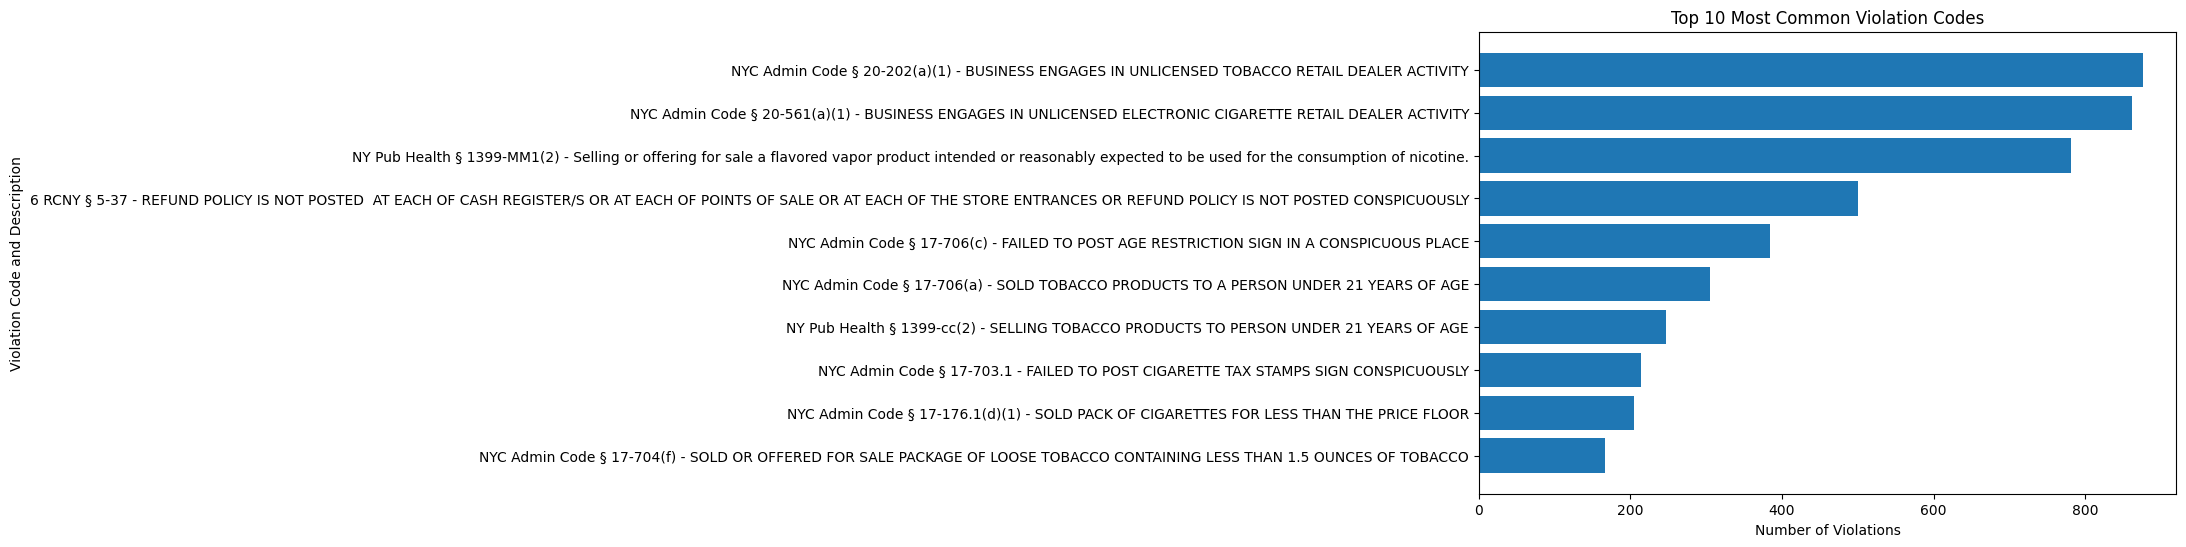

In [5]:
# Top 10 most common violation codes
# Get the top 10 violation charges by frequency
top10_charges = df['charge'].value_counts().nlargest(10)
print("Top 10 violation charges:\n", top10_charges)

# Plot as a horizontal bar chart for readability
plt.figure(figsize=(9,6))
top10_charges = top10_charges.sort_values(ascending=True)  # sort so smallest bar on bottom
plt.barh(top10_charges.index, top10_charges.values)
plt.title('Top 10 Most Common Violation Codes')
plt.xlabel('Number of Violations')
plt.ylabel('Violation Code and Description')
plt.tight_layout()
plt.show()


## Violations by Borough 

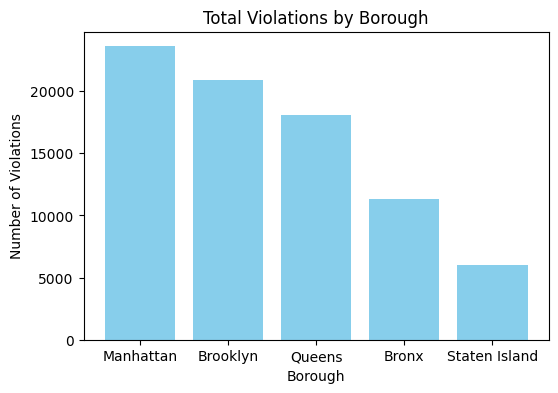

In [6]:
# Total violations by borough (simulated example)
borough_counts = {
    'Manhattan': 23593,
    'Brooklyn': 20918,
    'Queens': 18086,
    'Bronx': 11298,
    'Staten Island': 6000
}
plt.figure(figsize=(6,4))
plt.bar(borough_counts.keys(), borough_counts.values(), color='skyblue')
plt.title('Total Violations by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Violations')
plt.show()

# Aggregate to the business-level dataset

In [7]:
biz_df = prepare_business_dataset(df)
print("Business-level DataFrame shape:", biz_df.shape)
biz_df.head()


Business-level DataFrame shape: (2238, 5)


,business_id,total_violations,main_category,past_violations,repeat_offender
0,BA-1002678-2022,1,Grocery-Retail,0,0
1,BA-1002744-2022,4,Supermarket,3,1
2,BA-1004432-2022,1,Tobacco Retail Dealer,0,0
3,BA-1008404-2022,1,Supermarket,0,0
4,BA-1008467-2022,5,Electronic Cigarette Dealer,4,1


# Train & evaluate a Logistic Regression model

In [8]:
train_and_eval_logistic(biz_df)


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.61      0.78      0.69       161
           1       0.86      0.72      0.78       287

    accuracy                           0.74       448
   macro avg       0.73      0.75      0.73       448
weighted avg       0.77      0.74      0.75       448

Logistic ROC AUC: 0.786

=== Top 5 Coefficients ===
main_category_Tobacco Retail Dealer          2.305950
main_category_Electronic Cigarette Dealer    1.871449
main_category_Car Wash                       1.125119
main_category_Supermarket                    1.070556
main_category_Retail Laundry                 1.044586
dtype: float64


# Train & evaluate a Random Forest model

In [9]:
train_and_eval_rf(biz_df)

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.59      0.82      0.69       161
           1       0.87      0.68      0.76       287

    accuracy                           0.73       448
   macro avg       0.73      0.75      0.72       448
weighted avg       0.77      0.73      0.74       448

Random Forest ROC AUC: 0.781

=== Top 5 Features ===
main_category_Tobacco Retail Dealer          0.405680
main_category_Misc Non-Food Retail           0.141051
main_category_Electronic Cigarette Dealer    0.128527
main_category_Salons And Barbershop          0.087100
main_category_Retail Laundry                 0.043179
dtype: float64


# Forecast the next 6 months of violations

In [12]:
df = load_and_clean("DCWP_Charges_20250618.csv")
forecast = forecast_monthly(df, steps=6)
print("6-Month SARIMA Forecast:\n", forecast.round())


/drive/final_project_module.py:213: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series = df.set_index(date_col).resample('M').size()
/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/drive/final_project_module.py:229: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


=== 6-Month Forecast of Violations ===
2025-03-31    30.0
2025-04-30    37.0
2025-05-31    38.0
2025-06-30    38.0
2025-07-31    37.0
2025-08-31    38.0
Freq: ME, Name: predicted_mean, dtype: float64
6-Month SARIMA Forecast:
 2025-03-31    30.0
2025-04-30    37.0
2025-05-31    38.0
2025-06-30    38.0
2025-07-31    37.0
2025-08-31    38.0
Freq: ME, Name: predicted_mean, dtype: float64


# Plot forecast

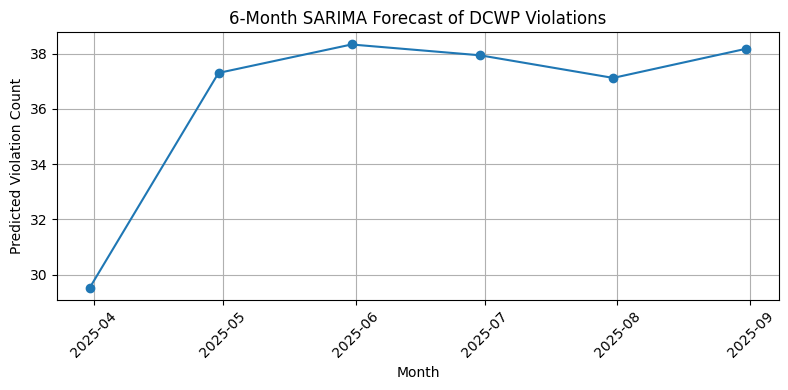

In [13]:
plt.figure(figsize=(8,4))
plt.plot(forecast.index, forecast.values, marker='o')
plt.title("6-Month SARIMA Forecast of DCWP Violations")
plt.xlabel("Month")
plt.ylabel("Predicted Violation Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()